In [47]:
# Generic
import pandas as pd
import scipy
import math
import numpy as np
from numpy import *

# Visualization
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define class to create 3D arrow
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

In [48]:
# Generate the data

# find normalized redshift distribution
def pdf(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

def cdf(x):
    return (1 + scipy.special.erf(x/np.sqrt(2))) / 2

def skew(x,e,w,a):
    t = (x-e) / w
    return 2 / w * pdf(t) * cdf(a*t)
    # You can of course use the scipy.stats.norm versions
    # return 2 * norm.pdf(t) * norm.cdf(a*t)

x = np.linspace(0 , 5.0 , int(3))

y1 = skew(x,2,1,1) + 0.05*np.random.rand(int(3))
y2 = 0.5*skew(x,2,1,5)+ 0.05*np.random.rand(int(3))
y3 = 0.1*skew(x,2,1,8)+ 0.05*np.random.rand(int(3))
y4 = 0.6*skew(x,2,1,1)+ 0.05*np.random.rand(int(3))
y5 = 1.3*skew(x,2,1,10)+ 0.05*np.random.rand(int(3))
y6 = 0.1*skew(x,2,1,11)+ 0.05*np.random.rand(int(3))

""" Write these points in data space """
Delta = np.array([y1,y2,y3,y4,y5,y6])

""" Perform PCA with sklearn """

pca = PCA()
pca_array = pca.fit(np.transpose(Delta))

# Find vectors in direction of PCs (normalized ,positive)
PCAs_vects_sklearn = np.transpose(pca_array.components_)

# Find eigenvalues for each PC
PCAs_eigenvals_sklearn = pca_array.singular_values_

#find PC vectors with variance for mag
SKL_norm_vec = np.multiply(PCAs_vects_sklearn , np.transpose(PCAs_eigenvals_sklearn))

[[-0.04298429 -0.86866179 -0.49353728]
 [-0.99700304  0.06909977 -0.03478737]
 [-0.06432177 -0.49056286  0.86902865]]


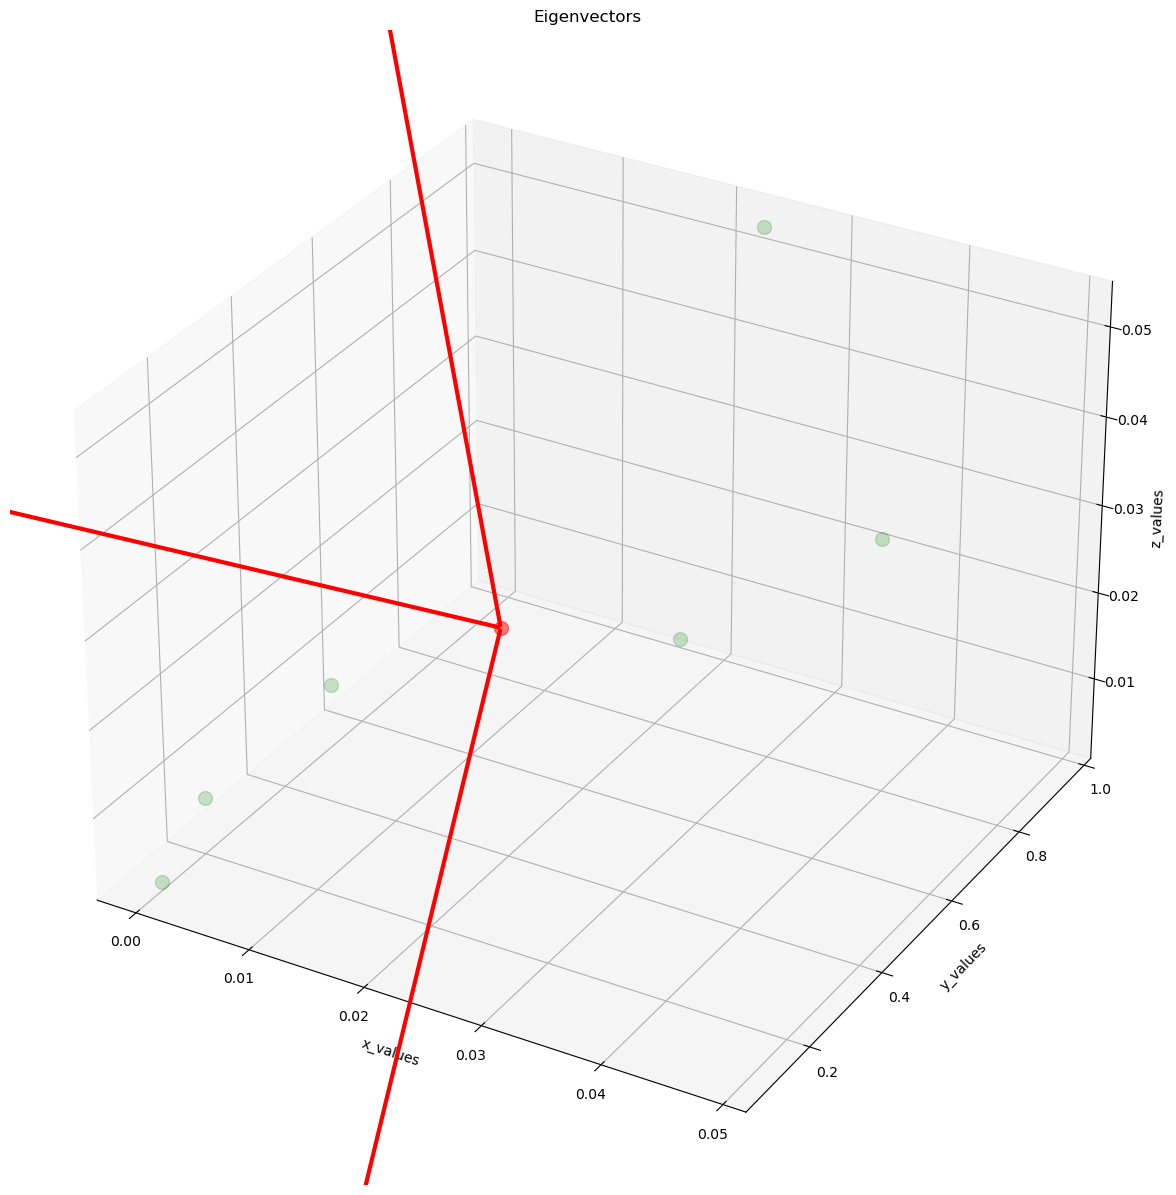

In [50]:
# concatenate data for PCA
samples = Delta

# mean values
mean_x = mean(samples[:,0])
mean_y = mean(samples[:,1])
mean_z = mean(samples[:,2])

#eigenvectors and eigenvalues
DDt = np.matmul( np.transpose(Delta), Delta)
eig_val, eig_vec = np.linalg.eig(DDt)

print(eig_vec)

################################
#plotting eigenvectors
################################    

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.plot(samples[:,0], samples[:,1], samples[:,2], 'o', markersize=10, color='g', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], 
                [mean_z, v[2]], mutation_scale=20, 
                lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.draw()
plt.show()